# Plot the Graph for the total number of issues with different labels created and closed on every date on GitHub for SPM587SP24 issues project

### Example of Issue Form Filled out

### Data Set File:  SPM587SP24issues.json

In [29]:
import os

import warnings
warnings.filterwarnings('ignore')

import pandas as pd                                    # panda's nickname is pd

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt

%matplotlib inline



# Requirement : Get the total number of issues with different labels for every date and plot them in a stacked chart

In [30]:
# Read the JSON file into a list of dictionaries

import json
list_of_issues_dict_data = [json.loads(line) for line in open('SPM587SP24issues.json')]

In [31]:
# Create the DataFrame object for the list_of_issues_dict_data object

issues_df = DataFrame(list_of_issues_dict_data)

In [32]:
# Sanity test: print rows in our DataFrame

issues_df
    

,issue_number,issue_title,issue_body,created_at,closed_at,labels,State,Author
0,830,React: Error when using useState hook inside u...,When attempting to use the useState hook insid...,2024-04-07,2024-04-07,"[DetectionPhase:Field, OriginationPhase:Coding...",closed,ASP24SCM96P
1,829,Implement Support for Interactive Data Visuali...,"Issue Description:\n\nCurrently, d3.js lacks b...",2024-04-07,2024-04-07,"[DetectionPhase:Testing, OriginationPhase:Desi...",closed,ASP24SCM61K
2,827,Improve Accessibility for Angular Components,"Currently, the accessibility features in Angul...",2024-04-06,None,"[DetectionPhase:Coding, OriginationPhase:Codin...",open,ASP24SCM61K
3,826,Feature Request: Improved Error Handling in An...,"As an Angular developer, I often find myself s...",2024-04-06,None,[],open,ASP24SCM96P
4,825,Error handling strategy for asynchronous opera...,Issue Description\nAngular applications often ...,2024-04-06,2024-04-06,"[Category:Bug, DetectionPhase:Testing, Origina...",closed,TSP24SCM91C
...,...,...,...,...,...,...,...,...
459,5,Test Issue 1,No Body for the Issue,2024-02-21,None,"[DetectionPhase:Design, OriginationPhase:Codin...",open,GSP23SCM93J
460,4,TestIssue_04,No Body for the Issue,2024-02-17,2024-03-09,"[DetectionPhase:Field, OriginationPhase:Coding...",closed,SPM587SP24
461,3,TestIssue_03,No Body for the Issue,2024-02-16,None,"[DetectionPhase:Design, OriginationPhase:Desig...",open,SPM587SP24
462,2,TestIssue_02,No Body for the Issue,2024-02-16,2024-03-09,"[Category:Bug, DetectionPhase:Design, Originat...",closed,SPM587SP24


In [33]:
# Prepare and Clean the dataframe object

wrangled_issues_df = issues_df[['Author','State','closed_at','created_at','issue_number','labels']]
wrangled_issues_df.loc[0:len(wrangled_issues_df), 'OriginationPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'DetectionPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Category']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Priority']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Status']= np.NaN


In [34]:
wrangled_issues_df

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,Status
0,ASP24SCM96P,closed,2024-04-07,2024-04-07,830,"[DetectionPhase:Field, OriginationPhase:Coding...",NaN,NaN,NaN,NaN,NaN
1,ASP24SCM61K,closed,2024-04-07,2024-04-07,829,"[DetectionPhase:Testing, OriginationPhase:Desi...",NaN,NaN,NaN,NaN,NaN
2,ASP24SCM61K,open,None,2024-04-06,827,"[DetectionPhase:Coding, OriginationPhase:Codin...",NaN,NaN,NaN,NaN,NaN
3,ASP24SCM96P,open,None,2024-04-06,826,[],NaN,NaN,NaN,NaN,NaN
4,TSP24SCM91C,closed,2024-04-06,2024-04-06,825,"[Category:Bug, DetectionPhase:Testing, Origina...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
459,GSP23SCM93J,open,None,2024-02-21,5,"[DetectionPhase:Design, OriginationPhase:Codin...",NaN,NaN,NaN,NaN,NaN
460,SPM587SP24,closed,2024-03-09,2024-02-17,4,"[DetectionPhase:Field, OriginationPhase:Coding...",NaN,NaN,NaN,NaN,NaN
461,SPM587SP24,open,None,2024-02-16,3,"[DetectionPhase:Design, OriginationPhase:Desig...",NaN,NaN,NaN,NaN,NaN
462,SPM587SP24,closed,2024-03-09,2024-02-16,2,"[Category:Bug, DetectionPhase:Design, Originat...",NaN,NaN,NaN,NaN,NaN


In [35]:
for i in range(0, len(wrangled_issues_df)):
    if wrangled_issues_df.iloc[i]['labels']:
        for label in wrangled_issues_df.iloc[i]['labels']:
            if len(label.split(':')) == 2:
                label_name= (label.split(':'))[0]
                label_value= (label.split(':'))[1]
                wrangled_issues_df.loc[i, label_name]=label_value
 

In [36]:
wrangled_issues_df

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,Status,Completed
0,ASP24SCM96P,closed,2024-04-07,2024-04-07,830,"[DetectionPhase:Field, OriginationPhase:Coding...",Coding,Field,Inquiry,Medium,pendingReview,NaN
1,ASP24SCM61K,closed,2024-04-07,2024-04-07,829,"[DetectionPhase:Testing, OriginationPhase:Desi...",Design,Testing,Enhancement,Major,Approved,NaN
2,ASP24SCM61K,open,None,2024-04-06,827,"[DetectionPhase:Coding, OriginationPhase:Codin...",Coding,Coding,NaN,Low,Completed,NaN
3,ASP24SCM96P,open,None,2024-04-06,826,[],NaN,NaN,NaN,NaN,NaN,NaN
4,TSP24SCM91C,closed,2024-04-06,2024-04-06,825,"[Category:Bug, DetectionPhase:Testing, Origina...",Requirements,Testing,Inquiry,Major,Rejected,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
459,GSP23SCM93J,open,None,2024-02-21,5,"[DetectionPhase:Design, OriginationPhase:Codin...",Coding,Design,NaN,Low,InProgress,NaN
460,SPM587SP24,closed,2024-03-09,2024-02-17,4,"[DetectionPhase:Field, OriginationPhase:Coding...",Coding,Field,NaN,High,Approved,NaN
461,SPM587SP24,open,None,2024-02-16,3,"[DetectionPhase:Design, OriginationPhase:Desig...",Design,Design,NaN,Major,InProgress,NaN
462,SPM587SP24,closed,2024-03-09,2024-02-16,2,"[Category:Bug, DetectionPhase:Design, Originat...",Design,Design,Bug,High,Completed,NaN


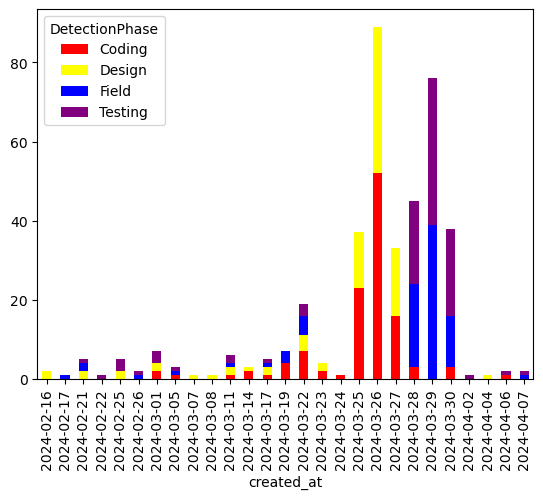

In [37]:
# Plot in Bar Chart the total number of issues created every day for every Detection Phase

LabelsReviewedByDate = wrangled_issues_df.groupby(['created_at','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['red', 'yellow', 'blue', 'purple', 'green', 'pink'], grid=False)

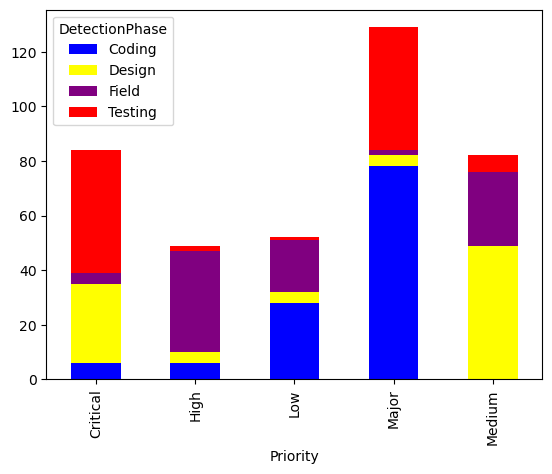

In [38]:
# Plot in Bar Chart the total number of issues created for every Phase based on their priorites

LabelsReviewedByDate = wrangled_issues_df.groupby(['Priority','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green', 'pink'], grid=False)

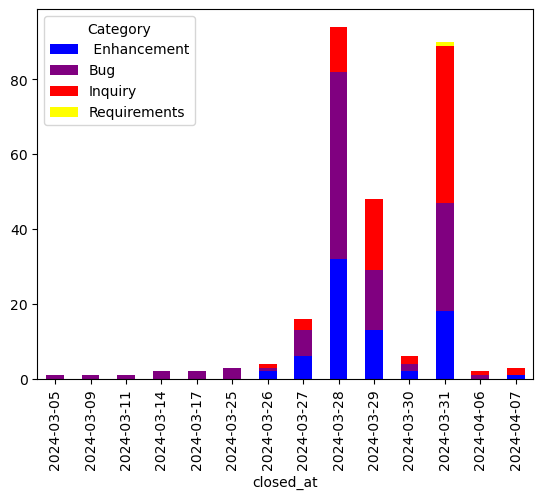

In [39]:
# Plot in Bar Chart the total number of issues closed every day for every Category

LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','Category']).closed_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red', 'yellow', 'green', 'pink'], grid=False)

#  Requirement #1: Plot in Bar Chart the total number of issues closed every day for every Origination Phase

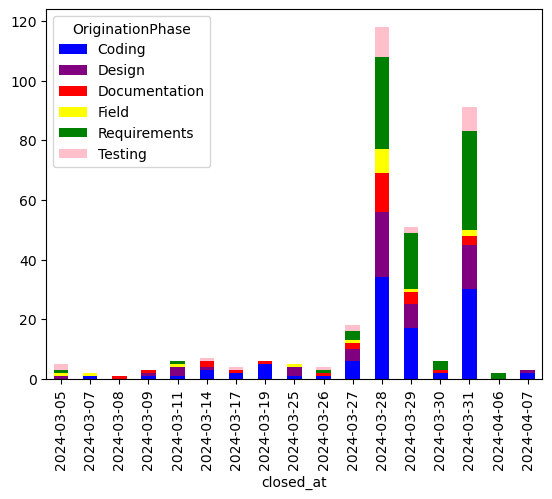

In [40]:
# Requirement #1: Add your code here

LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','OriginationPhase']).closed_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red', 'yellow', 'green', 'pink'], grid=False)

#  Requirement #2: # Plot in Bar Chart the total number of issues created for every Phase based on their Status

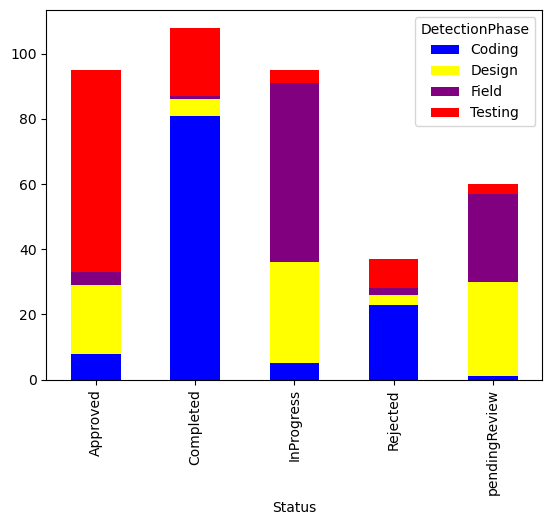

In [41]:
# Requirement #2: Add your code here


# Code for DetectionPhase vs. Status
LabelsReviewedByDate = wrangled_issues_df.groupby(['Status','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True, color=['blue','yellow', 'purple', 'red', 'green', 'pink'], grid=False)

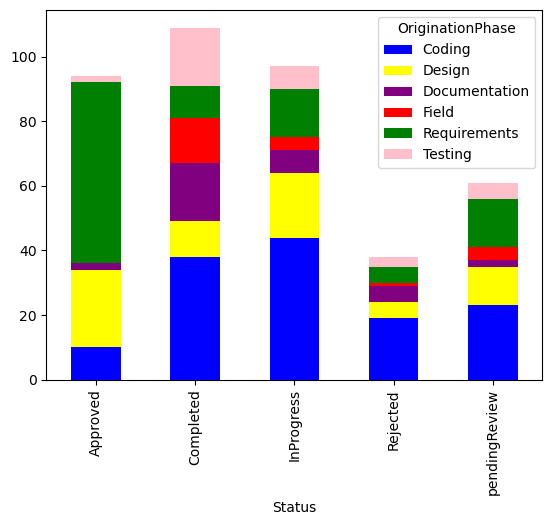

In [42]:
# Requirement #2: Add your code here

# Code for OriginationPhase vs. Status
LabelsReviewedByDate1 = wrangled_issues_df.groupby(['Status','OriginationPhase']).created_at.count()

dateLabelsFig1 = LabelsReviewedByDate1.unstack().plot(kind='bar',stacked=True, color=['blue','yellow', 'purple', 'red', 'green', 'pink'], grid=False)